# Use Bellman Equations to Solve Hungry-Full Problem

In [1]:
import sympy
from sympy import symbols
sympy.init_printing()

#### Bellman Expectation Equations

In [2]:
v_hungry, v_full = symbols('v_hungry v_full')
q_hungry_eat, q_hungry_none, q_full_eat, q_full_none = \
        symbols('q_hungry_eat q_hungry_none q_full_eat q_full_none')
alpha, beta, gamma = symbols('alpha beta gamma')
x, y = symbols('x y')

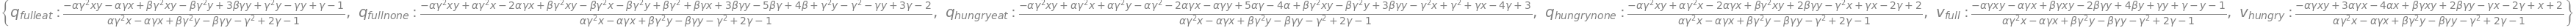

In [3]:
system = sympy.Matrix((
        (1, 0, x-1, -x, 0, 0, 0),
        (0, 1, 0, 0, -y, y-1, 0),
        (-gamma, 0, 1, 0, 0, 0, -2),
        ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
        (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
        (0, -gamma, 0, 0, 0, 1, 1) ))
sympy.solve_linear_system(system,
        v_hungry, v_full,
        q_hungry_none, q_hungry_eat, q_full_none, q_full_eat)

#### Bellman Optimal Equations

==== v(hungry) = q(hungry,not eat), v(full) = q(full,eat) ==== x = 0, y = 0 ====


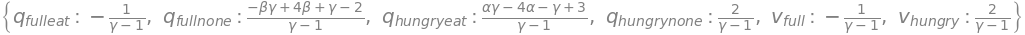

==== v(hungry) = q(hungry,eat), v(full) = q(full,eat) ==== x = 1, y = 0 ====


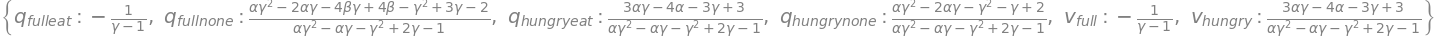

==== v(hungry) = q(hungry,not eat), v(full) = q(full,not eat) ==== x = 0, y = 1 ====


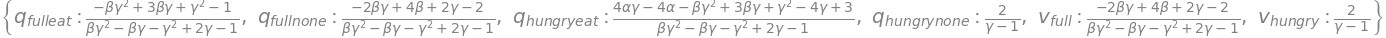

==== v(hungry) = q(hungry,eat), v(full) = q(full,not eat) ==== x = 1, y = 1 ====


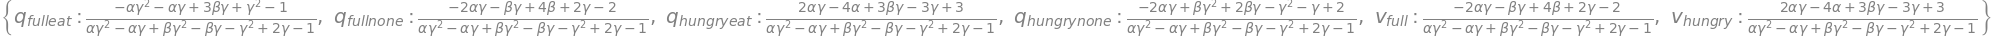

In [4]:
xy_tuples = ((0, 0), (1, 0), (0, 1), (1, 1))
for x, y in xy_tuples:
    system = sympy.Matrix((
            (1, 0, x-1, -x, 0, 0, 0),
            (0, 1, 0, 0, -y, y-1, 0),
            (-gamma, 0, 1, 0, 0, 0, -2),
            ((alpha-1)*gamma, -alpha*gamma, 0, 1, 0, 0, 4*alpha-3),
            (-beta*gamma, (beta-1)*gamma, 0, 0, 1, 0, -4*beta+2),
            (0, -gamma, 0, 0, 0, 1, 1) ))
    result = sympy.solve_linear_system(system,
            v_hungry, v_full,
            q_hungry_none, q_hungry_eat, q_full_none, q_full_eat, simplification=True)
    msgx = 'v(hungry) = q(hungry,{}eat)'.format('' if x else 'not ')
    msgy = 'v(full) = q(full,{}eat)'.format('not ' if y else '')
    print('==== {}, {} ==== x = {}, y = {} ===='.format(msgx, msgy, x, y))
    display(result)